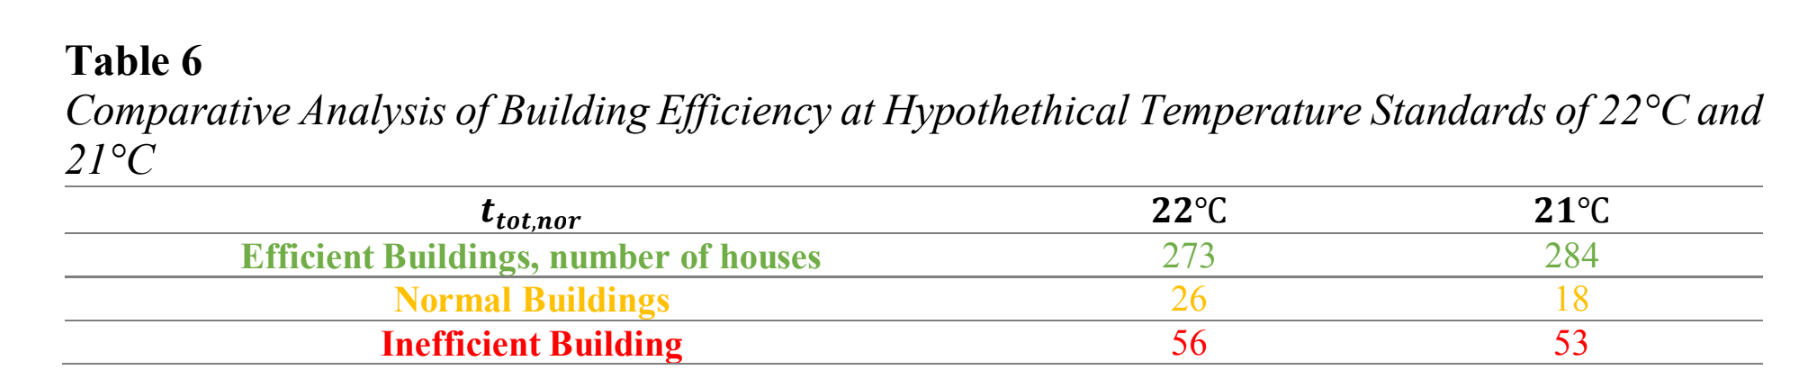

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Define the dataset
data = {
    'Type': ['Efficient Buildings', 'Normal Buildings', 'Inefficient Buildings'],
    'Count': [273, 26, 56]
}
total_houses = sum(data['Count'])
df = pd.DataFrame(data)

# Step 2: Calculate proportions and standard errors
df['Proportion'] = (df['Count'] / total_houses).round(3)
df['Standard Error'] = (np.sqrt((df['Proportion'].round(3) * (1 - df['Proportion'].round(3))) / total_houses)).round(3)

# Step 3: Calculate DEFF for clustering
rho = 0.02  # Intraclass correlation coefficient
m = 5  # Average cluster size
deff_clustering = 1 + rho * (m - 1)

# Adjust standard errors for clustering
df['Adjusted SE (Clustering)'] = (df['Standard Error'] * np.sqrt(deff_clustering)).round(3)

# Z-value for 95% confidence
z_value = 1.96

# Step 4: Calculate confidence intervals
df['Lower CI (Simple)'] = (df['Proportion'] - z_value * df['Standard Error']).round(3)
df['Upper CI (Simple)'] = (df['Proportion'] + z_value * df['Standard Error']).round(3)
df['Lower CI (Clustering)'] = (df['Proportion'] - z_value * df['Adjusted SE (Clustering)']).round(3)
df['Upper CI (Clustering)'] = (df['Proportion'] + z_value * df['Adjusted SE (Clustering)']).round(3)
df['DEFF (Clustering)'] = round(deff_clustering, 3)

# Display final results
print("Final Results with Clustering Adjustments:")
print(df)

# Optionally save to CSV
# df.to_csv("Building_Proportions_with_Clustering_Adjustments.csv", index=False)

Final Results with Clustering Adjustments:
                    Type  Count  Proportion  Standard Error  \
0    Efficient Buildings    273       0.769           0.022   
1       Normal Buildings     26       0.073           0.014   
2  Inefficient Buildings     56       0.158           0.019   

   Adjusted SE (Clustering)  Lower CI (Simple)  Upper CI (Simple)  \
0                     0.023              0.726              0.812   
1                     0.015              0.046              0.100   
2                     0.020              0.121              0.195   

   Lower CI (Clustering)  Upper CI (Clustering)  DEFF (Clustering)  
0                  0.724                  0.814               1.08  
1                  0.044                  0.102               1.08  
2                  0.119                  0.197               1.08  
